# Library

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder

from utils import *

# Data

In [2]:
df = pd.read_csv(
    r'../../data/cleaned/clean1.csv',
    encoding='utf-8',
)

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [4]:
df.head()

,product_type,sku,price,availability,number_of_products_sold,revenue_generated,customer_demographics,stock_levels,lead_times,order_quantities,...,location,lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,inspection_results,defect_rates,transportation_modes,routes,costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


# Load metadata

In [5]:
df = load_metadata(
    df,
    r"../../data/metadata/metadata1.json",
)

# Overview

## Check

In [6]:
print(f"Num of varibles:", df.shape[1])
print(f"Num of rows:", df.shape[0])

Num of varibles: 24
Num of rows: 100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    object 
 1   sku                      100 non-null    object 
 2   price                    100 non-null    float64
 3   availability             100 non-null    int64  
 4   number_of_products_sold  100 non-null    int64  
 5   revenue_generated        100 non-null    float64
 6   customer_demographics    100 non-null    object 
 7   stock_levels             100 non-null    int64  
 8   lead_times               100 non-null    int64  
 9   order_quantities         100 non-null    int64  
 10  shipping_times           100 non-null    int64  
 11  shipping_carriers        100 non-null    object 
 12  shipping_costs           100 non-null    float64
 13  supplier_name            100 non-null    object 
 14  location                 10

In [8]:
df.isnull().sum()

product_type               0
sku                        0
price                      0
availability               0
number_of_products_sold    0
revenue_generated          0
customer_demographics      0
stock_levels               0
lead_times                 0
order_quantities           0
shipping_times             0
shipping_carriers          0
shipping_costs             0
supplier_name              0
location                   0
lead_time                  0
production_volumes         0
manufacturing_lead_time    0
manufacturing_costs        0
inspection_results         0
defect_rates               0
transportation_modes       0
routes                     0
costs                      0
dtype: int64

## Varibles and target

In [ ]:
target = ['supplier_name ']
variablies = [col for col in df.columns if col not in target]

print(target)
print(variablies)

df_target = df[target]
df.drop(columns=target, axis=1, inplace=True)

# Grouping Varibles by their respective data types

In [10]:
numerical_cols, categorical_cols, _ = group_columns_by_type(df, display_info=True)

Total numeric columns: 15
Numeric columns: ['price', 'availability', 'number_of_products_sold', 'revenue_generated', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_costs', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'defect_rates', 'costs']

Total categorical columns: 8
Categorical columns: ['product_type', 'sku', 'customer_demographics', 'shipping_carriers', 'location', 'inspection_results', 'transportation_modes', 'routes']



# Univarite analysis

## Numerical variables

In [11]:
numerical_cols

['price',
 'availability',
 'number_of_products_sold',
 'revenue_generated',
 'stock_levels',
 'lead_times',
 'order_quantities',
 'shipping_times',
 'shipping_costs',
 'lead_time',
 'production_volumes',
 'manufacturing_lead_time',
 'manufacturing_costs',
 'defect_rates',
 'costs']

In [12]:
df = convert_columns_to_numeric(df, numerical_cols)

### Descriptive statistics for numeric columns

In [13]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
price,100.0,49.462461,31.168193,1.699976,19.597823,51.239831,77.198228,99.171329
availability,100.0,48.400000,30.743317,1.000000,22.750000,43.500000,75.000000,100.000000
number_of_products_sold,100.0,460.990000,303.780074,8.000000,184.250000,392.500000,704.250000,996.000000
revenue_generated,100.0,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976921,9866.465458
stock_levels,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000
lead_times,100.0,15.960000,8.785801,1.000000,8.000000,17.000000,24.000000,30.000000
order_quantities,100.0,49.220000,26.784429,1.000000,26.000000,52.000000,71.250000,96.000000
shipping_times,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
shipping_costs,100.0,5.548149,2.651376,1.013487,3.540248,5.320534,7.601695,9.929816
lead_time,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000


### Histogram

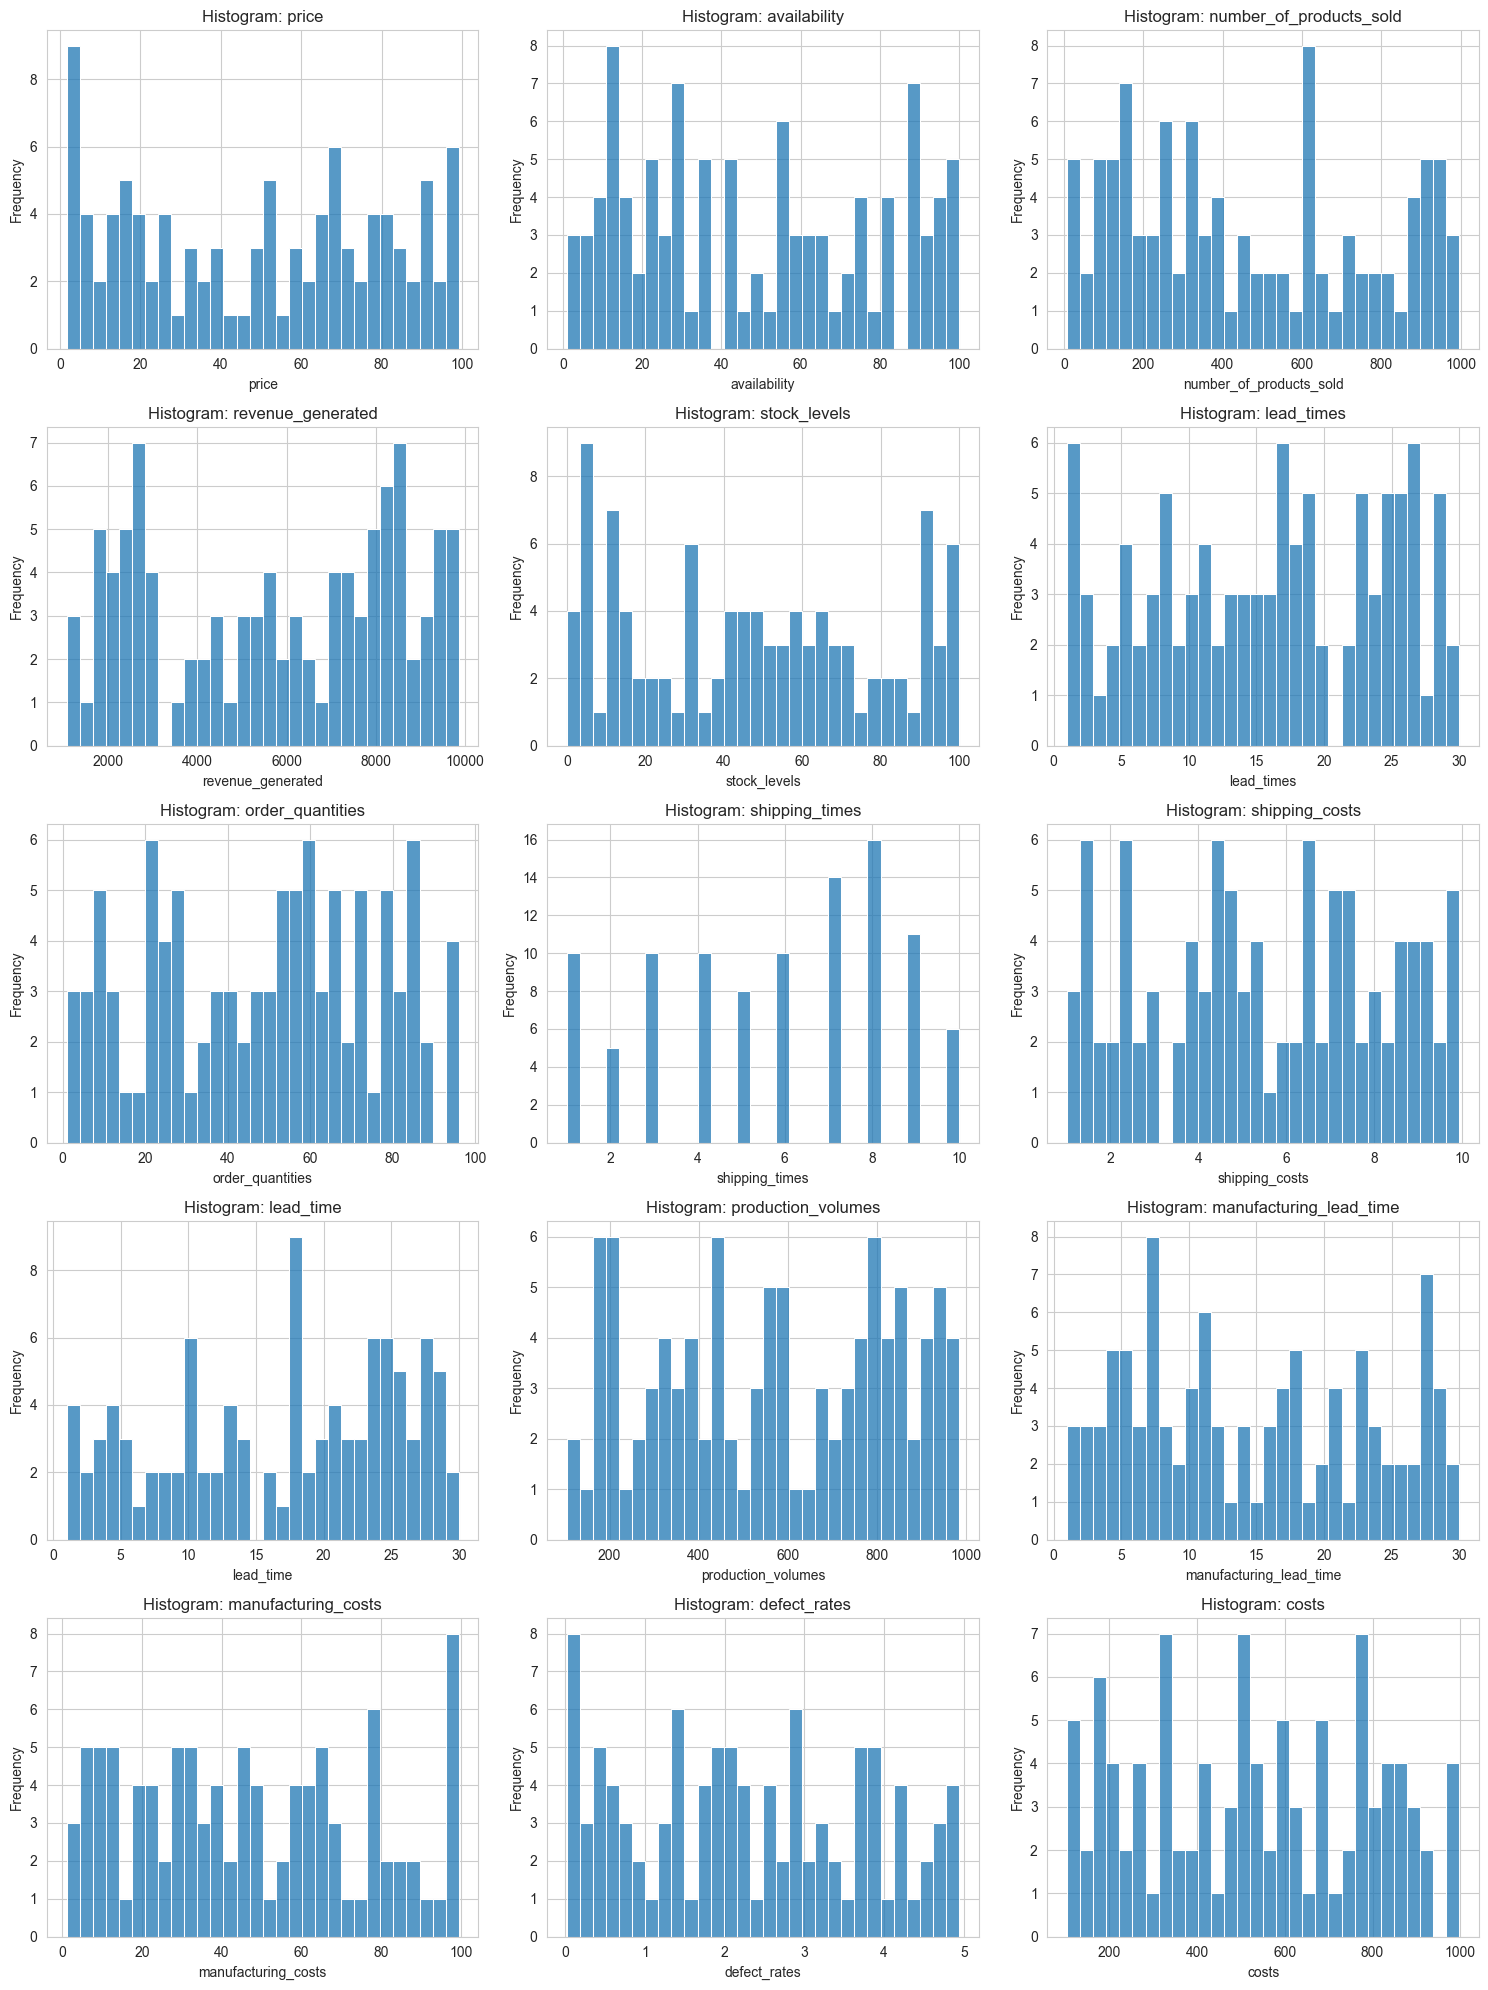

In [15]:
plot_multiple_histograms(df, numerical_cols, bins=30, color=None)

`shipping_times` may be transform to categorical variable

In [16]:
df['shipping_times_category'] = pd.cut(
    df['shipping_times'], 
    bins=[0, 3, 7, 10], 
    labels=['Express', 'Standard', 'Economy'],
    include_lowest=True
)

### Compute skew and kurtosis

In [18]:
result = []
for col in numerical_cols:
    sk = skew(df[col].dropna())
    kt = kurtosis(df[col].dropna())
    result.append({"Variable": col, "Skewness": sk, "Kurtosis": kt})
pd.DataFrame(result)

,Variable,Skewness,Kurtosis
0,price,-0.022199,-1.365158
1,availability,0.180852,-1.325725
2,number_of_products_sold,0.277179,-1.249100
3,revenue_generated,-0.171211,-1.407104
4,stock_levels,0.100063,-1.232890
5,lead_times,-0.127883,-1.189639
6,order_quantities,-0.105756,-1.123494
7,shipping_times,-0.277348,-1.077881
8,shipping_costs,-0.052929,-1.184617
9,lead_time,-0.321292,-1.176014


### Boxplot

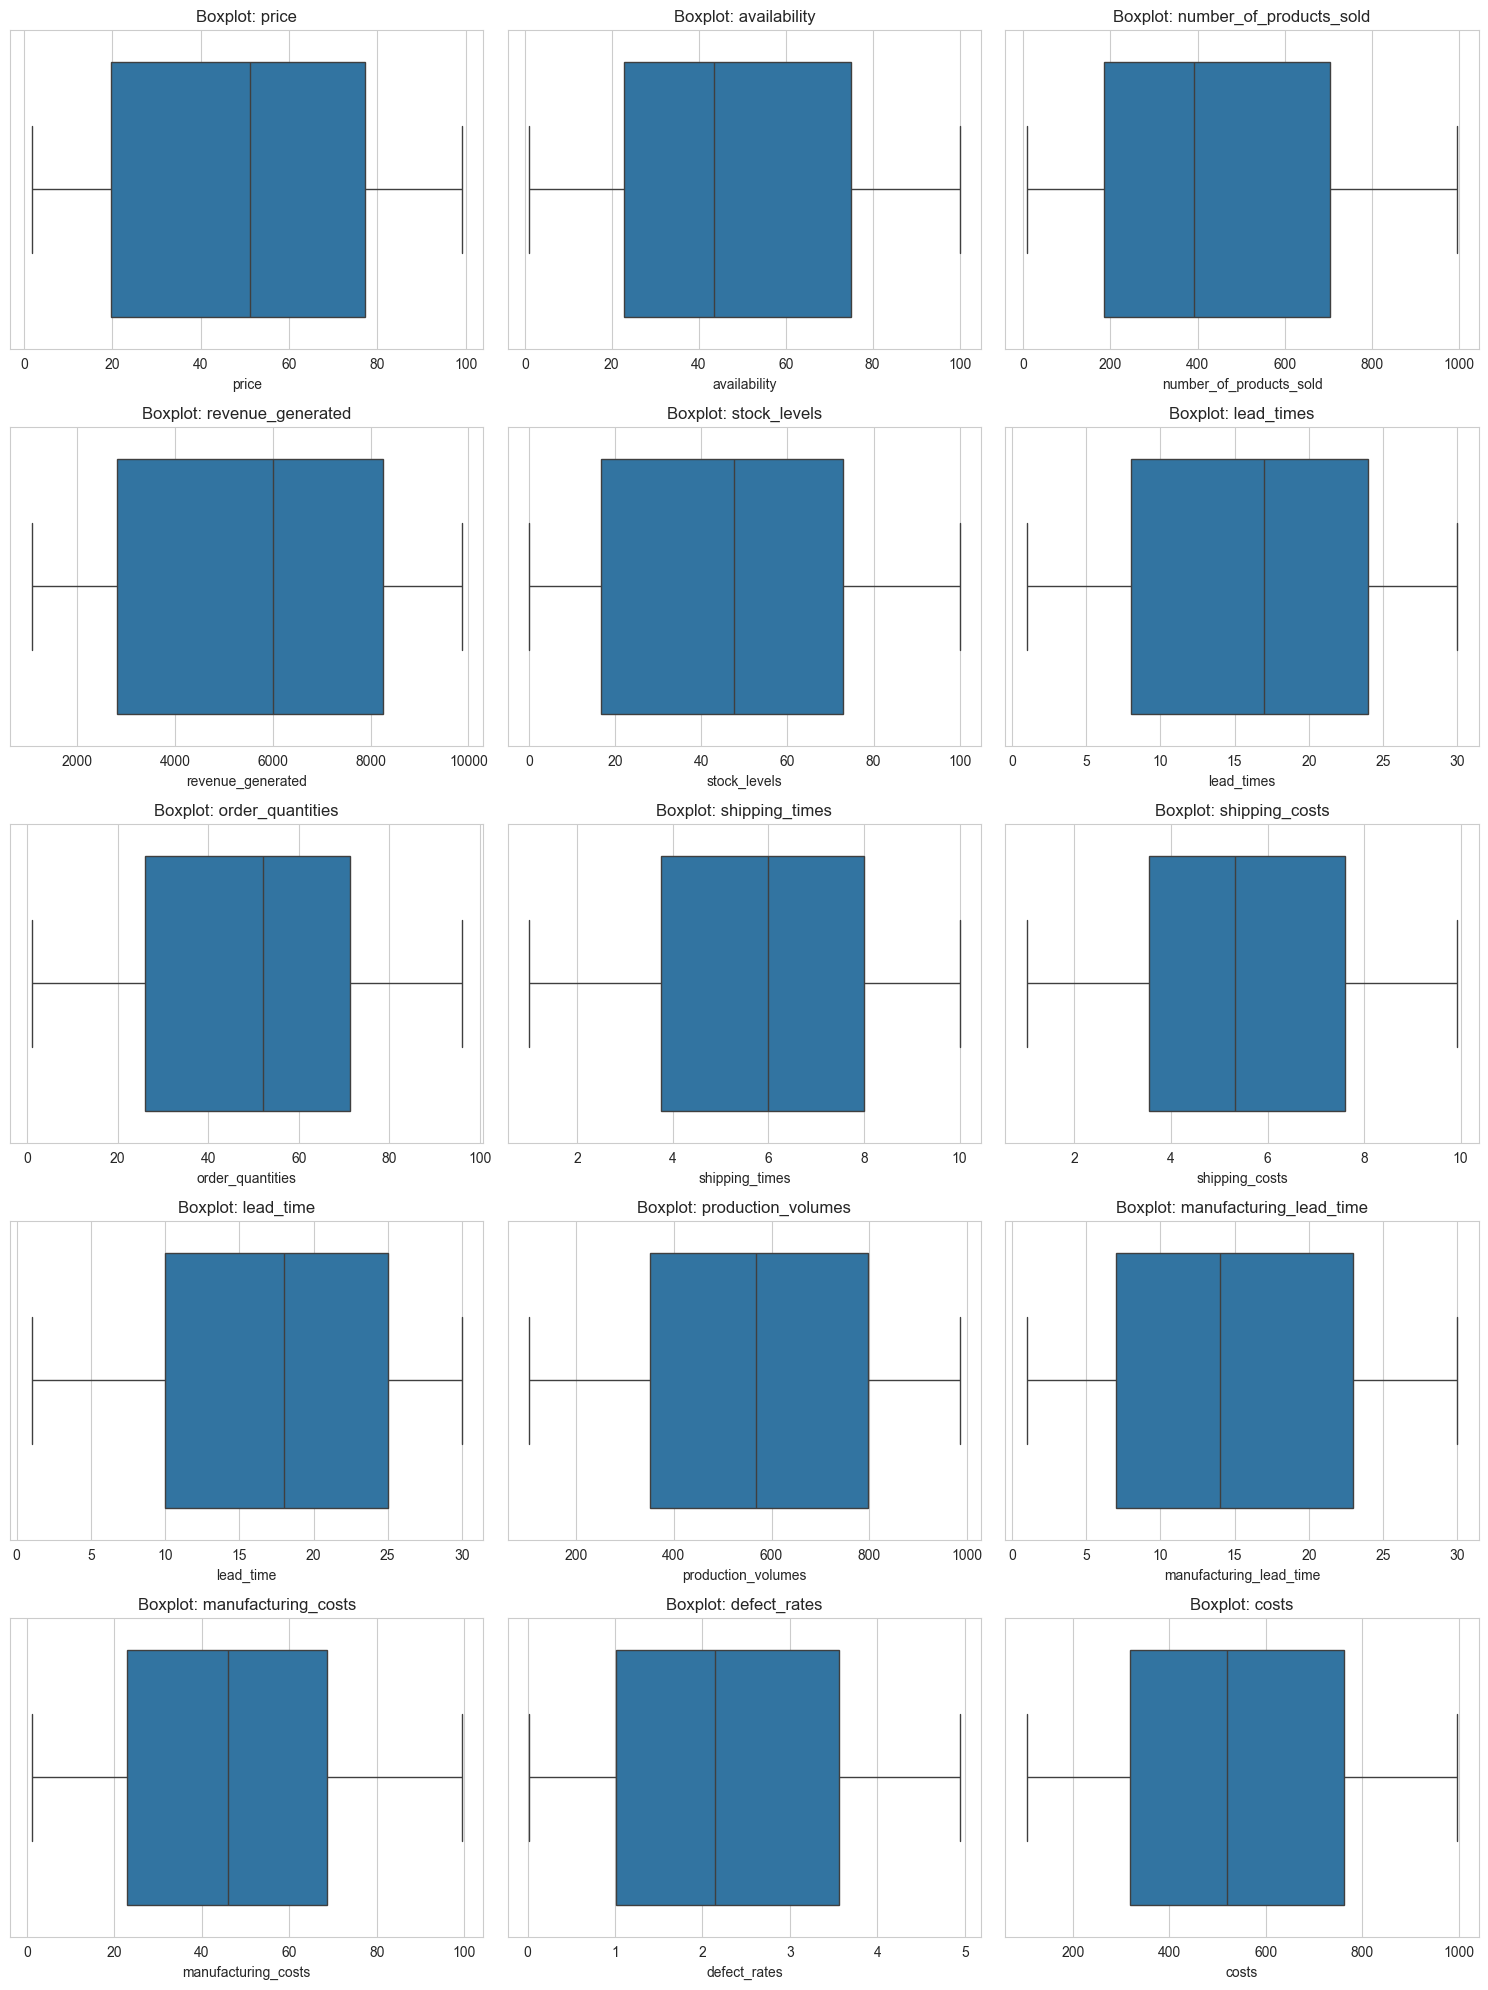

In [19]:
plot_multiple_boxplots(df, numerical_cols, n_cols=3)

### After

In [21]:
numerical_cols, categorical_cols, _ = group_columns_by_type(df, display_info=True)

Total numeric columns: 15
Numeric columns: ['price', 'availability', 'number_of_products_sold', 'revenue_generated', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_costs', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'defect_rates', 'costs']

Total categorical columns: 9
Categorical columns: ['product_type', 'sku', 'customer_demographics', 'shipping_carriers', 'location', 'inspection_results', 'transportation_modes', 'routes', 'shipping_times_category']



## Categorical variables

In [22]:
df = convert_columns_to_category(df, categorical_cols)

### Unique values in each variables

In [23]:
for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values in {col}: {df[col].nunique()}")
    print(f"Unique values in {col}: {df[col].unique()}")
    print()

Column: product_type
Number of unique values in product_type: 3
Unique values in product_type: ['haircare', 'skincare', 'cosmetics']
Categories (3, object): ['cosmetics', 'haircare', 'skincare']

Column: sku
Number of unique values in sku: 100
Unique values in sku: ['SKU0', 'SKU1', 'SKU2', 'SKU3', 'SKU4', ..., 'SKU95', 'SKU96', 'SKU97', 'SKU98', 'SKU99']
Length: 100
Categories (100, object): ['SKU0', 'SKU1', 'SKU10', 'SKU11', ..., 'SKU96', 'SKU97', 'SKU98', 'SKU99']

Column: customer_demographics
Number of unique values in customer_demographics: 4
Unique values in customer_demographics: ['Non-binary', 'Female', 'Unknown', 'Male']
Categories (4, object): ['Female', 'Male', 'Non-binary', 'Unknown']

Column: shipping_carriers
Number of unique values in shipping_carriers: 3
Unique values in shipping_carriers: ['Carrier B', 'Carrier A', 'Carrier C']
Categories (3, object): ['Carrier A', 'Carrier B', 'Carrier C']

Column: location
Number of unique values in location: 5
Unique values in locat

### Value counts

In [24]:
for col in categorical_cols:
    print(df[col].value_counts().sort_values(ascending=False).reset_index())
    print()

  product_type  count
0     skincare     40
1     haircare     34
2    cosmetics     26

      sku  count
0    SKU0      1
1    SKU1      1
2   SKU10      1
3   SKU11      1
4   SKU12      1
..    ...    ...
95  SKU95      1
96  SKU96      1
97  SKU97      1
98  SKU98      1
99  SKU99      1

[100 rows x 2 columns]

  customer_demographics  count
0               Unknown     31
1                Female     25
2            Non-binary     23
3                  Male     21

  shipping_carriers  count
0         Carrier B     43
1         Carrier C     29
2         Carrier A     28

    location  count
0    Kolkata     25
1     Mumbai     22
2    Chennai     20
3  Bangalore     18
4      Delhi     15

  inspection_results  count
0            Pending     41
1               Fail     36
2               Pass     23

  transportation_modes  count
0                 Road     29
1                 Rail     28
2                  Air     26
3                  Sea     17

    routes  count
0  Route A    

### Countplot

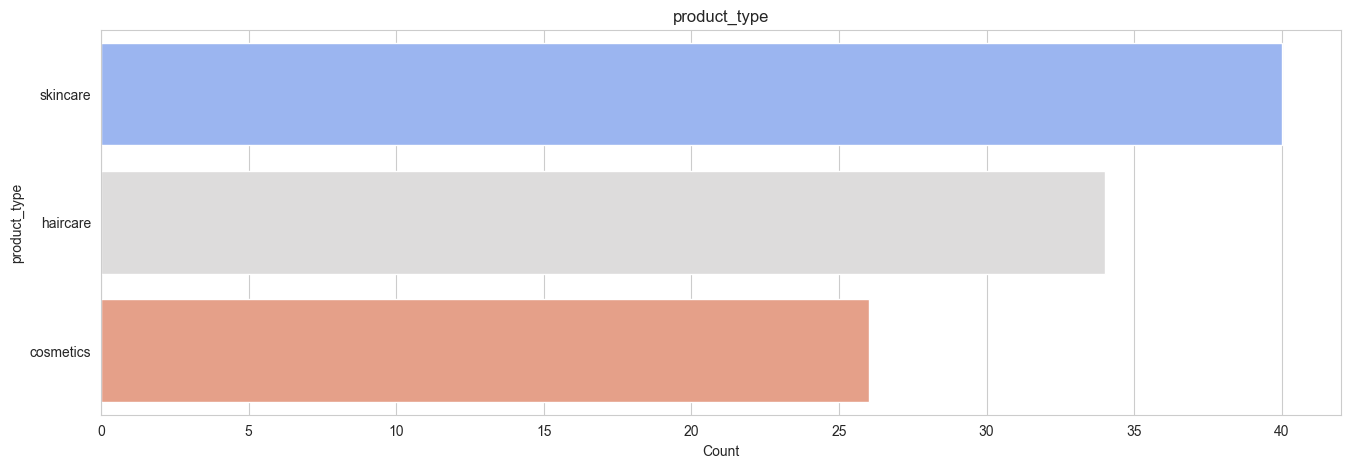

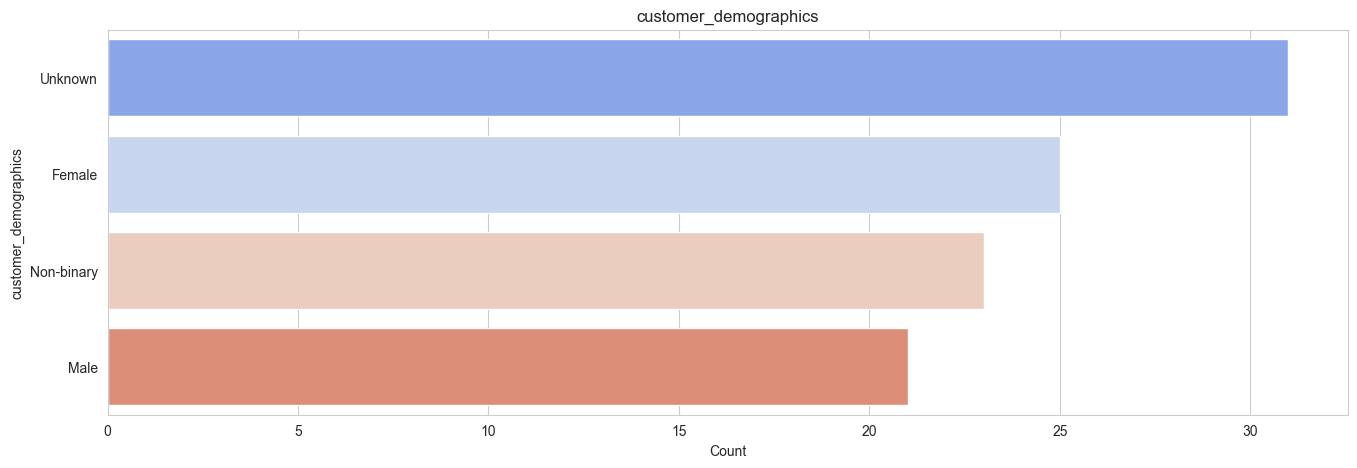

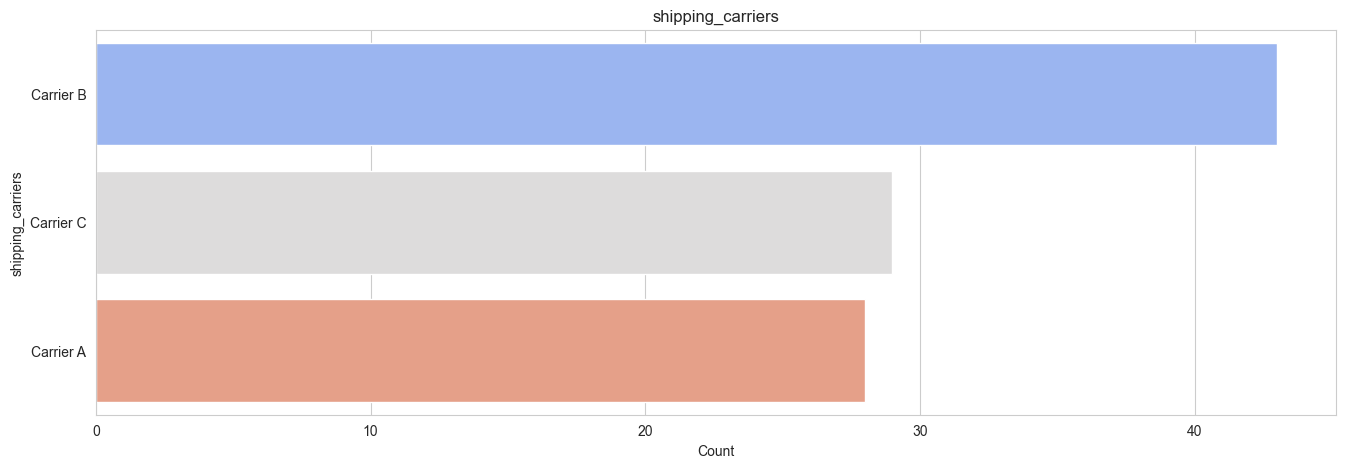

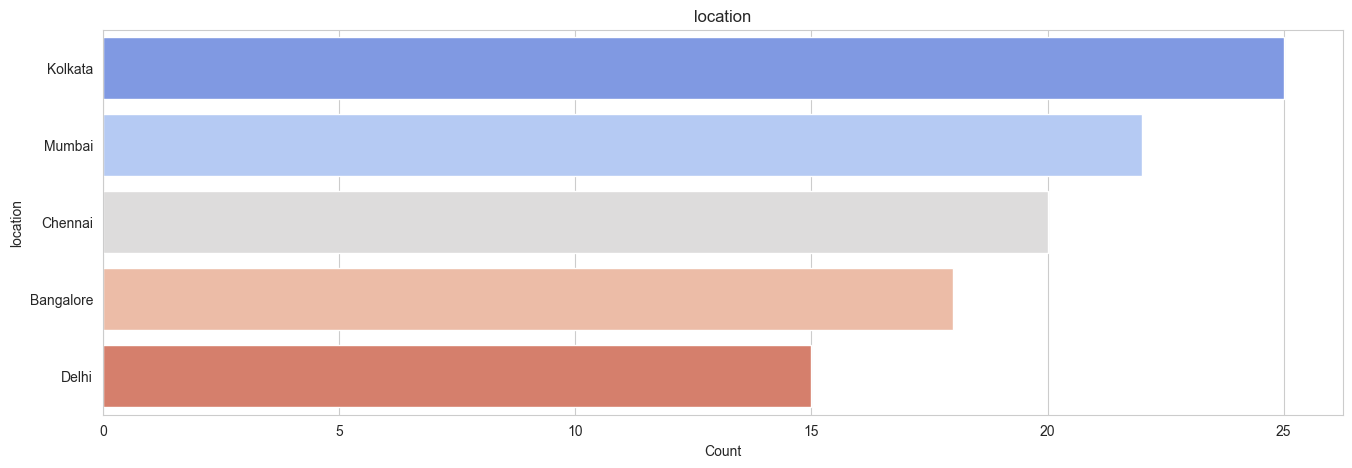

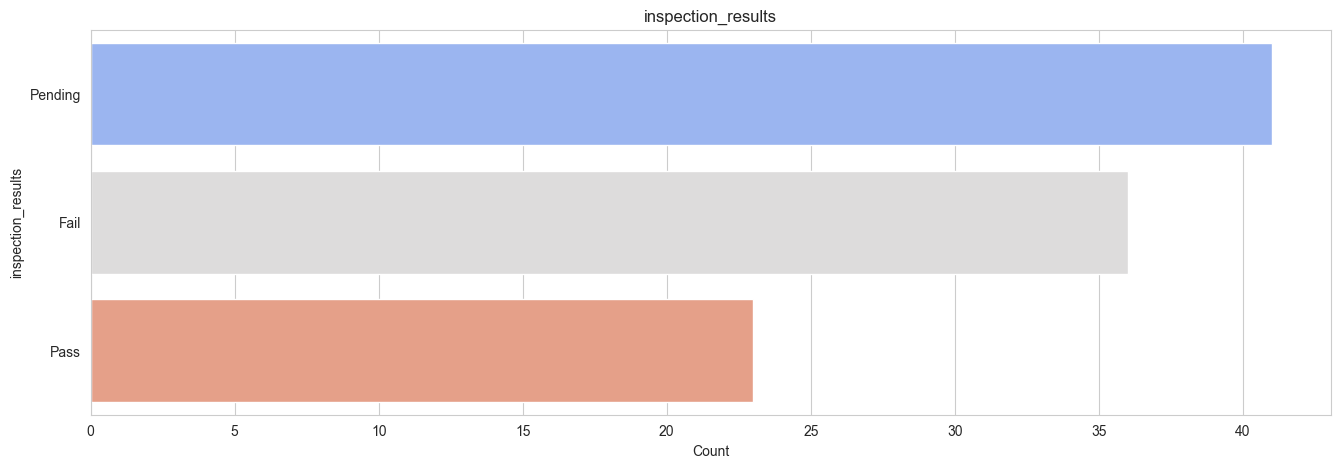

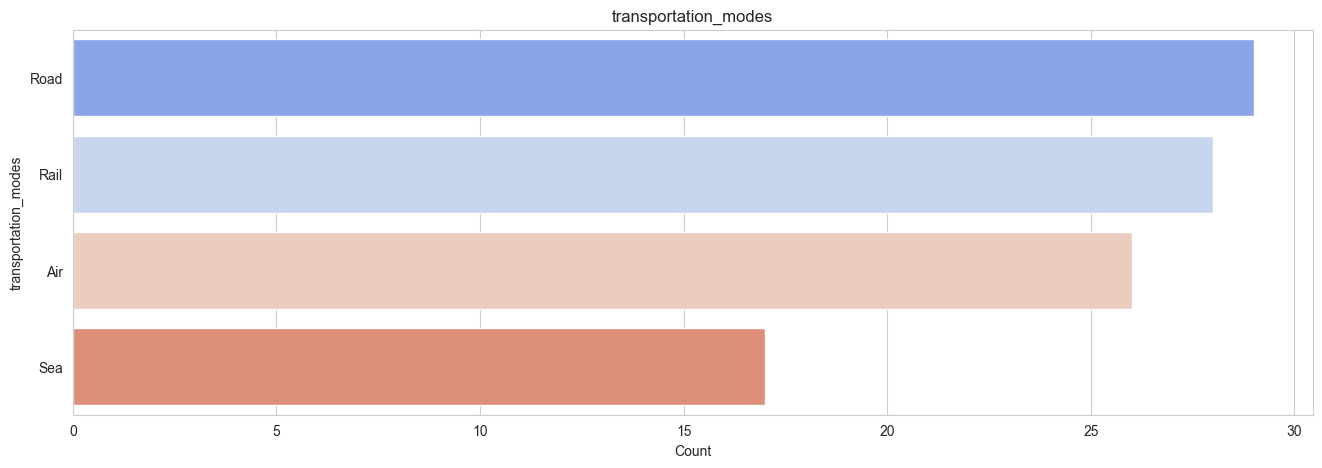

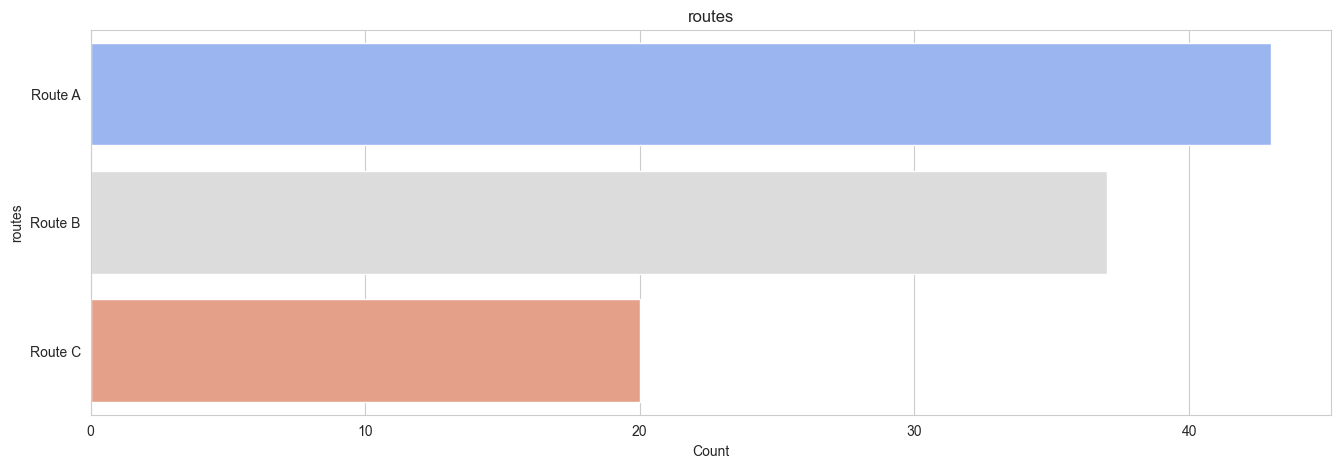

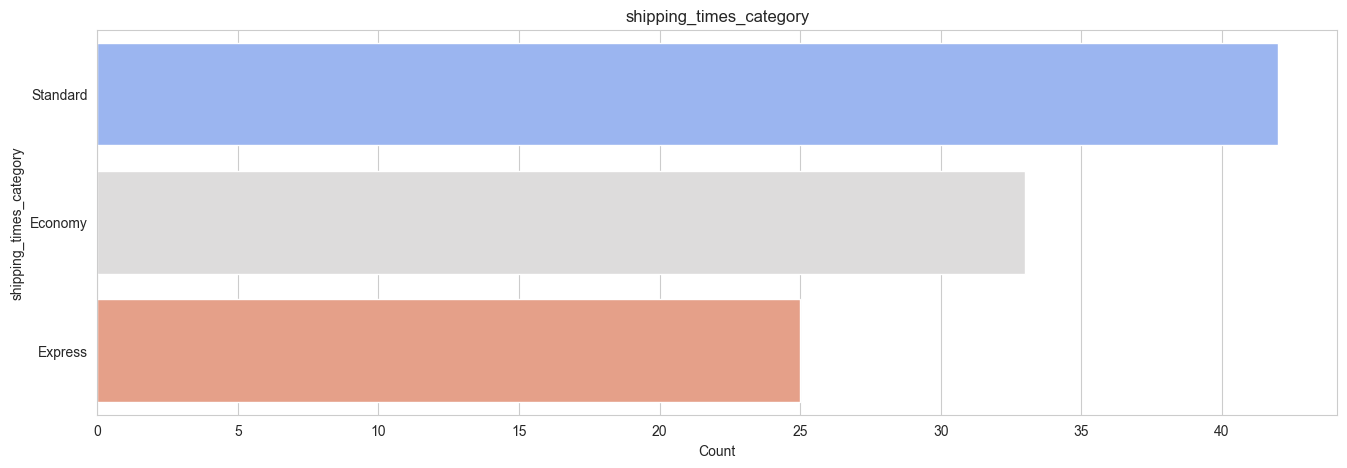

In [37]:
for col in categorical_cols:
    if col == "sku":
        continue
    else:
        plt.figure(figsize=(16, 5))
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette='coolwarm')
        plt.title(f'{col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

# Target

In [38]:
df_target.columns

Index(['supplier_name'], dtype='object')

In [39]:
df_target[target] = convert_column_to_category(df_target, target[0])

## Descriptive statistics 

In [40]:
class_counts = df_target.value_counts()
class_counts

supplier_name
Supplier 1       27
Supplier 2       22
Supplier 4       18
Supplier 5       18
Supplier 3       15
Name: count, dtype: int64

In [41]:
class_percent = df_target.value_counts(normalize=True) * 100
class_percent

supplier_name
Supplier 1       27.0
Supplier 2       22.0
Supplier 4       18.0
Supplier 5       18.0
Supplier 3       15.0
Name: proportion, dtype: float64

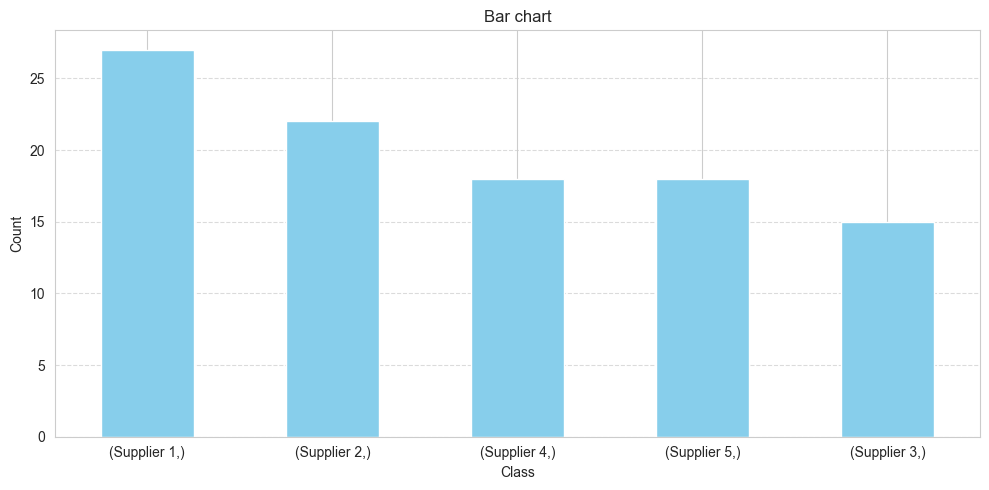

In [48]:
plt.figure(figsize=(10, 5))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Bar chart')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


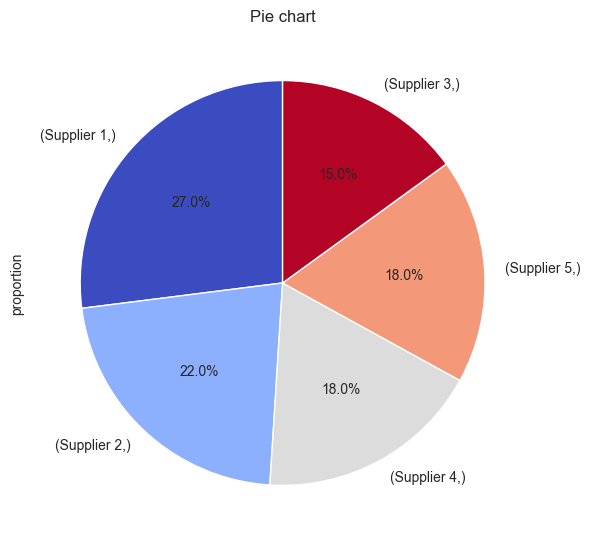

In [51]:
plt.figure(figsize=(6, 6))
class_percent.plot(kind='pie', autopct='%.1f%%', startangle=90, cmap='coolwarm')
plt.title('Pie chart')
plt.tight_layout()
plt.show()

## Label Encoding

In [54]:
# Scikit-learn
encoder = LabelEncoder()
df_target['supplier_name'] = encoder.fit_transform(df_target['supplier_name'])

In [55]:
df_target.value_counts()

supplier_name
0                27
1                22
3                18
4                18
2                15
Name: count, dtype: int64

In [58]:
df_target = convert_column_to_category(df_target, target[0])
df_target.dtypes

supplier_name    category
dtype: object

# Save

In [60]:
df = pd.concat([df[numerical_cols + categorical_cols], df_target], axis=1)

## Metadata `.json`

In [ ]:
save_metadata(
    df,
    r"../../data/metadata/metadata2.json",
)

## To `.csv`

In [64]:
df.to_csv(
    r"../../data/cleaned/clean2.csv",
    index=False,
    encoding="utf-8",
)